Credit Card Risk Analysis

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#uploading .csv file
from google.colab import files


uploaded = files.upload()

Saving credit-card-risk-analysis.csv to credit-card-risk-analysis.csv


In [3]:
#loading dataset in a variable
data = pd.read_csv('credit-card-risk-analysis.csv')

In [4]:
#describes summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#for diaplaying top rows
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#last rows for dataset
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
#summary in terms of mean , meadian , statistical terms
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#shape of dataset  #rows and columns
data.shape

(614, 13)

In [9]:
#for finding element is missing (NaN) or not in a dataset
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
#for finding element is missing (NaN) or not in a dataset
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
#how many have heart disease and how many don't
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Male      394
Female     86
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

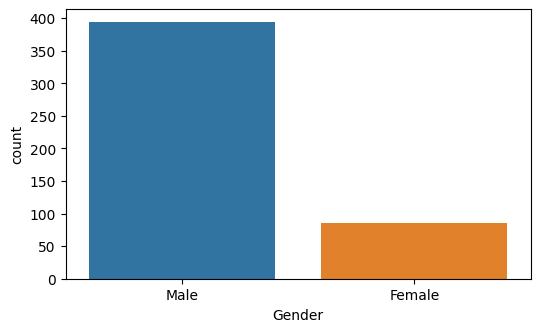

In [13]:
plt.figure(figsize=(6, 3.5))
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data )

Yes    311
No     169
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

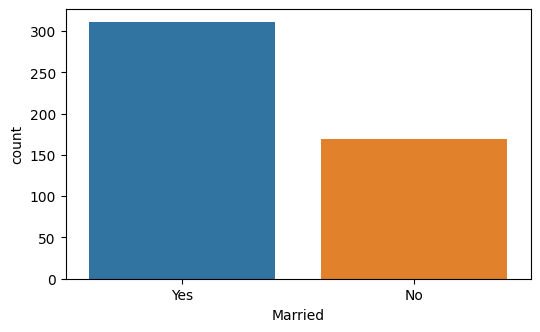

In [14]:
#no. of people loaans as by maritual status
plt.figure(figsize=(6, 3.5))
print(data[ 'Married'].value_counts())
sns.countplot(x='Married', data=data)

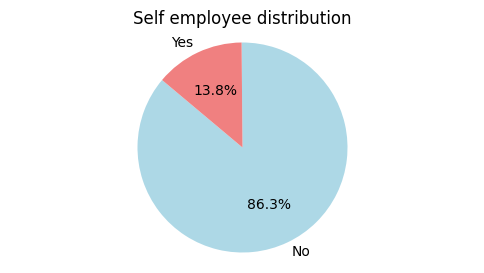

In [15]:
#pie chart representation
Self_Employed_count = data['Self_Employed'].value_counts()
plt.figure(figsize=(6, 3))

plt.pie(Self_Employed_count, labels=['No', 'Yes'], colors=['lightblue', 'lightcoral'], autopct='%1.1f%%', startangle=140)
plt.title('Self employee distribution')
plt.axis('equal')
plt.show()
#around 15 %are self employeed and around 85% are not self_employeed

In [16]:
# printing all data types (for converting object types)
for column in data.columns:
  if data[column].dtype == object:
    print(str(column) + ' : '+str(data[column].unique()))
    print(data[column].value_counts())
    print('_______')

Loan_ID : ['LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011' 'LP001013'
 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001028' 'LP001029'
 'LP001030' 'LP001032' 'LP001036' 'LP001038' 'LP001043' 'LP001046'
 'LP001047' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001095'
 'LP001097' 'LP001098' 'LP001100' 'LP001112' 'LP001114' 'LP001116'
 'LP001119' 'LP001120' 'LP001131' 'LP001138' 'LP001144' 'LP001146'
 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179' 'LP001186'
 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199' 'LP001205'
 'LP001206' 'LP001207' 'LP001222' 'LP001225' 'LP001228' 'LP001233'
 'LP001238' 'LP001241' 'LP001243' 'LP001245' 'LP001248' 'LP001253'
 'LP001255' 'LP001256' 'LP001259' 'LP001263' 'LP001265' 'LP001267'
 'LP001275' 'LP001279' 'LP001282' 'LP001289' 'LP001310' 'LP001316'
 'LP001318' 'LP001319' 'LP001322' 'LP001325' 'LP001327' 'LP001333'
 'LP001334' 'LP001343' 'LP001345' 'LP001349' 'LP001367' 'LP001369'
 'LP001379' 'LP001384' 'LP001385' 'LP001401' 'LP0014

# classification methods

# Random forest

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
            'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
            'Credit_History', 'Property_Area']
X = data[features]
y = data['Loan_Status']

In [19]:
categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical Columns with Non-Numeric Values:")
print(X[categorical_columns].apply(lambda col: col.str.isnumeric()).any())


Categorical Columns with Non-Numeric Values:
Gender           False
Married          False
Dependents        True
Education        False
Self_Employed    False
Property_Area    False
dtype: bool


In [20]:
X = pd.get_dummies(X, drop_first=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


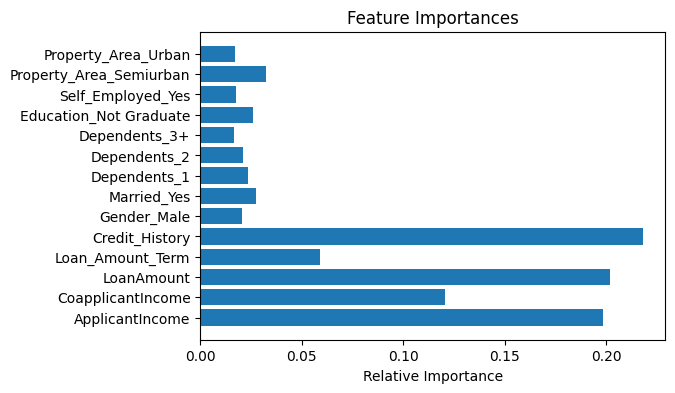

In [22]:
importances = model.feature_importances_
indices = X_train.columns
plt.figure(figsize=(6, 4))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances, align="center")
plt.yticks(range(len(indices)), indices)
plt.xlabel("Relative Importance")
plt.show()

Navie bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
features = ['ApplicantIncome', 'LoanAmount']
X = data[features]
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6979166666666666


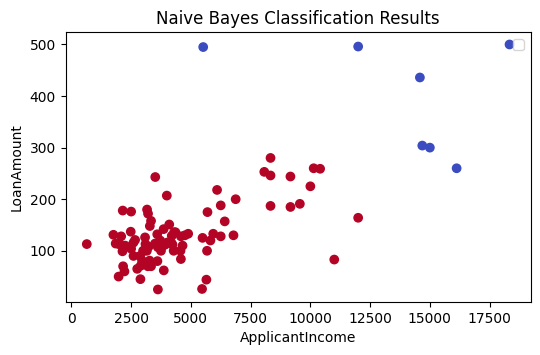

In [25]:
color_map = {'N': 0, 'Y': 1}  # Mapping 'N' to 0 and 'Y' to 1
plt.figure(figsize=(6, 3.5))
colors = [color_map[label] for label in y_pred]
plt.scatter(X_test['ApplicantIncome'], X_test['LoanAmount'], c=colors, cmap=plt.cm.coolwarm)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('Naive Bayes Classification Results')
plt.legend()
plt.show()

based on the income of the applicant the loan amount will be high as most of the people are between the income stream of 2500 - 5000 they have limited loan amount.

LASSO

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

In [27]:
X = data[['ApplicantIncome']]
y = data['Loan_Status']

y_binary = np.where(y == 'Y', 1, 0)
model = Lasso(alpha=0.01, random_state=42)
model.fit(X, y_binary)
coefficient = model.coef_[0]

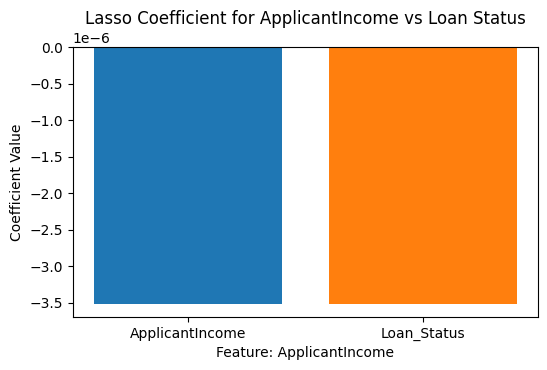

In [28]:
plt.figure(figsize=(6, 3.5))
plt.bar('ApplicantIncome', coefficient)
plt.bar('Loan_Status', coefficient)
plt.xlabel('Feature: ApplicantIncome')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficient for ApplicantIncome vs Loan Status')
plt.show()

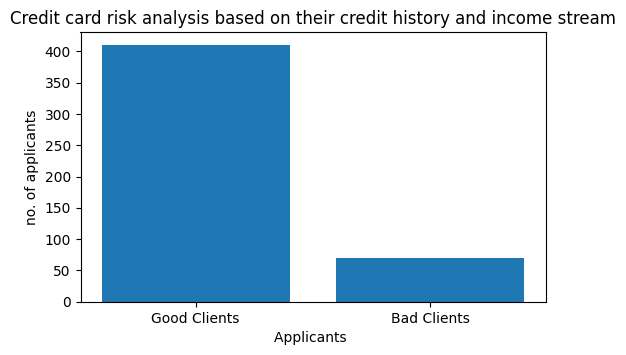

In [29]:
data['Client_Category'] = (data['Credit_History'] == 1) & (data['ApplicantIncome'] + data['CoapplicantIncome'] >= data['LoanAmount'])

Applicant_counts = data['Client_Category'].value_counts()

plt.figure(figsize=(6, 3.5))
plt.bar(['Good Clients', 'Bad Clients'], Applicant_counts)
plt.xlabel('Applicants ')
plt.ylabel('no. of applicants')
plt.title('Credit card risk analysis based on their credit history and income stream')
plt.show()

**Around 85% applicants are good clients which means there less credit risk for the compant / bank . And around 15% applicants dont have proper credit history or proper income stream , so these 15% appliants can cause risk for the bank.**

In [30]:
good_credit_card_holders = data[data['Client_Category']].shape[0]
bad_credit_card_holders = data[~data['Client_Category']].shape[0]

print("Number of no risk people:", good_credit_card_holders)
print("Number of risk people:", bad_credit_card_holders)

Number of no risk people: 410
Number of risk people: 70


# CONCLUSION:


Around 82% applicants are male applicants And 18% applicants are female applicants . And around 87% are Self employed on 13% are not self employed . And around 65% applicants are married and 35% are unmarried. And based on random forest, the accuracy is  83%. And other classifications like Navie bayes , lasso regression and logistic regression and other classification are also applied. Based on the overall classifications and considerations the *good credit card holders* which means no risk of cardholders is ***around 85%*** And ***highly risk card holders*** is ***around 15%*** And this Classification is done based on income stream and loan amount and long term.